
## Deep Learning Project: Build a Traffic Sign Recognition Classifier

In this notebook, I have implemented a modified Lenet to classify german traffic signs.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
##  Load The Data

In [1]:
# Load pickled data
import pickle
from __future__ import print_function

# To do Q1

# For python 3. Comment for python 2.
# training_file = 'train.p' 
# validation_file= 'valid.p'
# testing_file = 'test.p'

# For python 2 uncomment the following lines and comment the above 
training_file = 'train_2.pkl'
validation_file= 'valid_2.pkl'
testing_file = 'test_2.pkl'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

###  A Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

import numpy as np
# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = np.unique(y_train).size # len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


In [3]:
## Ans 1. The dataset contains 34799 training examples, 12630 testing examples, 4410 validation examples.
## There are 43 classes and the input images are RGB images of 32x32 size.



### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [4]:
import numpy as np
sign_class, class_index_begs, class_counts = np.unique(y_train, return_index = True, return_counts = True)
from pandas.io.parsers import read_csv
from matplotlib import pyplot as plot
sign_name = read_csv("signnames.csv").values[:, 1]

# Ans 2 : Name of different classes of the traffic signals

###  Name of the classes of different traffic signals

In [5]:
sign_name

array(['Speed limit (20km/h)', 'Speed limit (30km/h)',
       'Speed limit (50km/h)', 'Speed limit (60km/h)',
       'Speed limit (70km/h)', 'Speed limit (80km/h)',
       'End of speed limit (80km/h)', 'Speed limit (100km/h)',
       'Speed limit (120km/h)', 'No passing',
       'No passing for vehicles over 3.5 metric tons',
       'Right-of-way at the next intersection', 'Priority road', 'Yield',
       'Stop', 'No vehicles', 'Vehicles over 3.5 metric tons prohibited',
       'No entry', 'General caution', 'Dangerous curve to the left',
       'Dangerous curve to the right', 'Double curve', 'Bumpy road',
       'Slippery road', 'Road narrows on the right', 'Road work',
       'Traffic signals', 'Pedestrians', 'Children crossing',
       'Bicycles crossing', 'Beware of ice/snow', 'Wild animals crossing',
       'End of all speed and passing limits', 'Turn right ahead',
       'Turn left ahead', 'Ahead only', 'Go straight or right',
       'Go straight or left', 'Keep right', 'Keep le

In [6]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

## The following cell is to display 5 signs belonging to each class

50
Class  0: Speed limit (20km/h)                               180 samples 


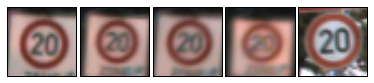

###############################################################################

Class  1: Speed limit (30km/h)                               1980 samples 


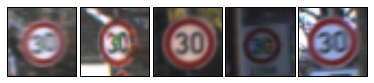

###############################################################################

Class  2: Speed limit (50km/h)                               2010 samples 


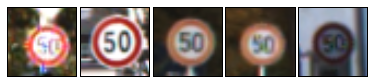

###############################################################################

Class  3: Speed limit (60km/h)                               1260 samples 


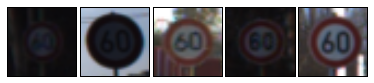

###############################################################################

Class  4: Speed limit (70km/h)                               1770 samples 


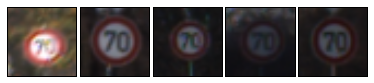

###############################################################################

Class  5: Speed limit (80km/h)                               1650 samples 


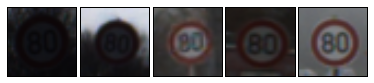

###############################################################################

Class  6: End of speed limit (80km/h)                        360 samples 


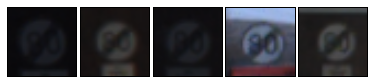

###############################################################################

Class  7: Speed limit (100km/h)                              1290 samples 


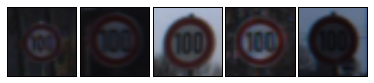

###############################################################################

Class  8: Speed limit (120km/h)                              1260 samples 


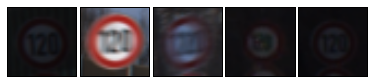

###############################################################################

Class  9: No passing                                         1320 samples 


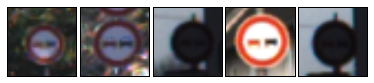

###############################################################################

Class  10: No passing for vehicles over 3.5 metric tons       1800 samples 


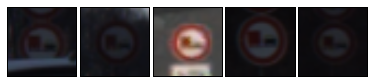

###############################################################################

Class  11: Right-of-way at the next intersection              1170 samples 


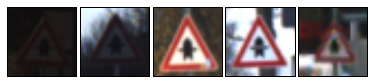

###############################################################################

Class  12: Priority road                                      1890 samples 


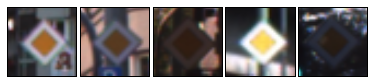

###############################################################################

Class  13: Yield                                              1920 samples 


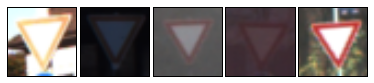

###############################################################################

Class  14: Stop                                               690 samples 


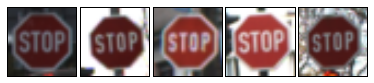

###############################################################################

Class  15: No vehicles                                        540 samples 


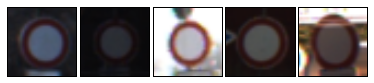

###############################################################################

Class  16: Vehicles over 3.5 metric tons prohibited           360 samples 


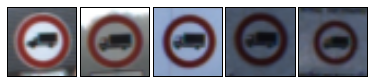

###############################################################################

Class  17: No entry                                           990 samples 


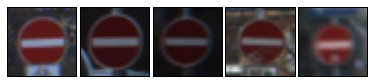

###############################################################################

Class  18: General caution                                    1080 samples 


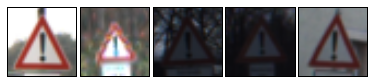

###############################################################################

Class  19: Dangerous curve to the left                        180 samples 


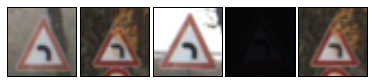

###############################################################################

Class  20: Dangerous curve to the right                       300 samples 


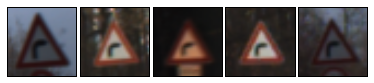

###############################################################################

Class  21: Double curve                                       270 samples 


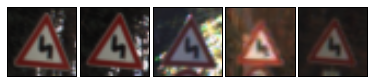

###############################################################################

Class  22: Bumpy road                                         330 samples 


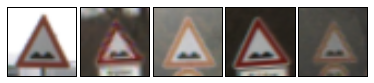

###############################################################################

Class  23: Slippery road                                      450 samples 


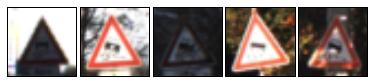

###############################################################################

Class  24: Road narrows on the right                          240 samples 


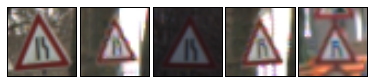

###############################################################################

Class  25: Road work                                          1350 samples 


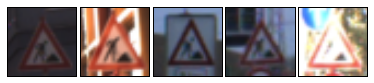

###############################################################################

Class  26: Traffic signals                                    540 samples 


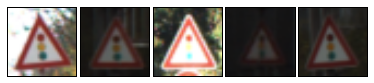

###############################################################################

Class  27: Pedestrians                                        210 samples 


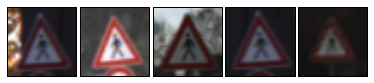

###############################################################################

Class  28: Children crossing                                  480 samples 


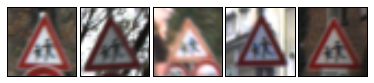

###############################################################################

Class  29: Bicycles crossing                                  240 samples 


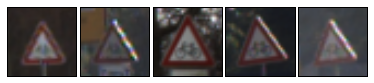

###############################################################################

Class  30: Beware of ice/snow                                 390 samples 


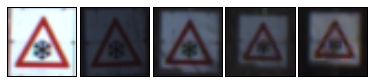

###############################################################################

Class  31: Wild animals crossing                              690 samples 


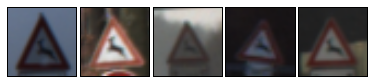

###############################################################################

Class  32: End of all speed and passing limits                210 samples 


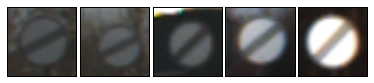

###############################################################################

Class  33: Turn right ahead                                   599 samples 


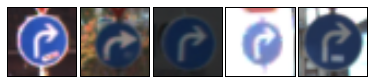

###############################################################################

Class  34: Turn left ahead                                    360 samples 


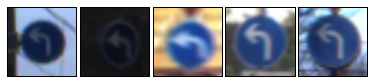

###############################################################################

Class  35: Ahead only                                         1080 samples 


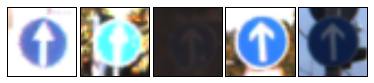

###############################################################################

Class  36: Go straight or right                               330 samples 


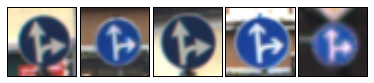

###############################################################################

Class  37: Go straight or left                                180 samples 


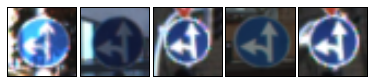

###############################################################################

Class  38: Keep right                                         1860 samples 


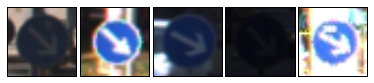

###############################################################################

Class  39: Keep left                                          270 samples 


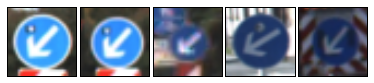

###############################################################################

Class  40: Roundabout mandatory                               300 samples 


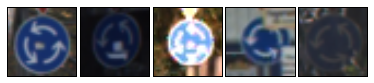

###############################################################################

Class  41: End of no passing                                  210 samples 


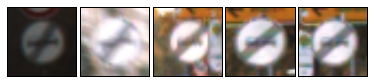

###############################################################################

Class  42: End of no passing by vehicles over 3.5 metric tons 210 samples 


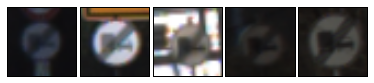

###############################################################################



In [7]:
max_col_width = max(len(sign) for sign in sign_name)
import random
print(max_col_width)
num_signs = 5
# Let's display 5 random pics from each 
for c,class_index_beg,class_count in zip(sign_class,class_index_begs,class_counts):
    print("Class  %d: %-*s %s samples " %(c,max_col_width,sign_name[c],str(class_count)))
    fig = plot.figure(figsize=(5,1))
    fig.subplots_adjust(left = 0, right = 1, bottom = 0, top = 1, hspace = 0.05, wspace = 0.05)

    random_ind = random.sample(range(class_index_beg,class_index_beg+class_count),num_signs)
    for idx in range(num_signs):
        axis = fig.add_subplot(1,num_signs,idx+1,xticks=[],yticks=[])
        axis.imshow(X_train[random_ind[idx]])
    plot.show()
    print("###############################################################################\n")

    


# Histogram Distribution of samples

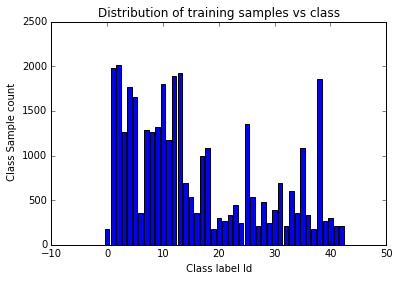

In [13]:
# Histogram Distribution of number of samples

class_id = sign_class
# class_counts obtained from np.unique in above cell
plot.bar(class_id,class_counts,width=0.8,align='center')
plot.xlabel(" Class label Id ")
plot.ylabel(" Class Sample count")
plot.title("Distribution of training samples vs class")
plot.show()

In [14]:
from scipy.ndimage.interpolation import shift,rotate
def rotateOrShift(img):
    """
    
    Depending on random choice either rotates/shifts image
    """
    if random.choice((True, False)):
        aug_image = shift(img, [random.randrange(-2, 2), random.randrange(-2, 2), 0])
    else:
        aug_image = rotate(img, random.randrange(-10, 10), reshape=False)
    return aug_image

In [10]:
def augment_flipping(X,y,n_classes):
    """
    In the current example
    Total there are 43 classes
    Some are flippable horizontally and retain same class
    Some are flippable vertically and retain same class
    Some can be flipped in both directions and still retain same class
    Some if flipped horizontally get classified as other class
    """
    # Classes that are horizontally_flippable and retain same class
    hor_flip = set([11,12,13,15,17,18,22,26,30,35])
    # Classes that are vertically flippable and retain same class
    ver_flip = set([1,5,12,15,17])
    # Classes that can be flipped vertically, then horizontally still classified as same class
    hor_ver_flip = set([32,40])
    
    # Classes that flipped horizontally get classified as some other class
    change_on_flip = {19:20, 33:34,36:37,38:39,20:19,34:33,37:36,39:38}
    
    total_classes = n_classes
    X_aug = []
    y_aug = []
    num_samples = X.shape[0]
    for i in range(num_samples):
        c = y[i] # class id
        x_curr = X[i] # 32x32x3
        y_curr = y[i]
        if c in hor_flip:
            X_aug.append(x_curr[:,::-1,:])
            y_aug.append(y_curr)
        
        if c in change_on_flip:
            X_aug.append(x_curr[:,::-1,:])
            y_new = change_on_flip[c]
            y_aug.append(y_new)
        
        if c in ver_flip:
            X_aug.append(x_curr[::-1,:,:])
            y_aug.append(y_curr)
        
        if c in hor_ver_flip:
            X_aug.append(x_curr[::-1,::-1,:])
            y_aug.append(y_curr)
    
    
    X_aug = np.array(X_aug,dtype=X.dtype)
    y_aug = np.array(y_aug,dtype=y.dtype)
    return X_aug,y_aug
        
    
            
    
    
    

In [19]:
X_aug,y_aug = augment_flipping(X_train,y_train,n_classes)


# Additional Data Generation



For this dataset, I observed that in the total of 43 classes Some are flippable horizontally and retain same class
Some are flippable vertically and retain same class
Some can be flipped in both directions and still retain same class
Some if flipped horizontally get classified as other class
    
 Classes that are horizontally_flippable and retain same class [11,12,13,15,17,18,22,26,30,35])
 Classes that are vertically flippable and retain same class [1,5,12,15,17]
 Classes that can be flipped vertically, then horizontally still classified as same class [32,40])
 Classes that flipped horizontally get classified as some other class
 change_on_flip = {19:20, 33:34,36:37,38:39,20:19,34:33,37:36,39:38}

 So using this property I generated some additional data



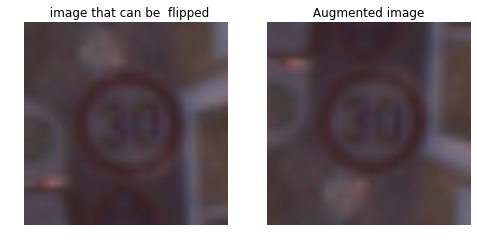

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(8, 8))
axs = axs.ravel()
axs[0].axis('off')
axs[0].set_title("  image that can be  flipped")
axs[0].imshow(img[0])

axs[1].axis('off')
axs[1].set_title(" Augmented image ")
axs[1].imshow(aug_img[0])

In [28]:
X_train = np.append(X_train,X_aug,axis=0)
y_train = np.append(y_train,y_aug,axis=0)

----

##  Design and Testing  Model Architecture



### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [32]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
import cv2

# First Convert images to ycbcr
img_mean = 0
def preprocessImages(img_rgb_arr):
    """
    input  : img_rgb_arr = numpy array of images nx32x32x3
    output : processed_image = numpy array of nx32x32x1
    """
    img_y = np.array([cv2.cvtColor(img_rgb,cv2.COLOR_RGB2GRAY) for img_rgb in img_rgb_arr])
    img_y = np.array([cv2.convertScaleAbs(image) for image in img_y])

    img_hist_eq = np.array([cv2.equalizeHist(img) for img in img_y])
    img_hist_processed = img_hist_eq[...,np.newaxis]
    global image_mean
    image_mean = np.mean(img_hist_processed)
    img_normalised = (img_hist_processed-np.mean(img_hist_processed))
    
    #img_normalised = (np.array(img_hist_processed,np.float)-128.)/128.0
    
    return img_normalised

X_train_processed = preprocessImages(X_train)
X_valid_processed = preprocessImages(X_valid)
X_test_processed = preprocessImages(X_test)

# Preprocessing steps

Preprocessing steps
For preprocessing I used the following steps:
 1. Convert image to grayscale from rgb using cv2.cvtcolor().
 2. Do Histogram Equalization , as the samples have varying degrees of light intensity and color.
 3. Subtract the mean of the entire dataset from the data. This is to make the distribution zero mean.

Note : I tried making samples, zero mean unit variance by doing X = (X-128.)/128. This didn't help my network very well so i skipped it. Also I used y data by converting images to ycrcb format. However, it was taking much more epochs to train than the regular rgb. I believe this was due to me unable to set proper hyperparameters and my network being shallow.

After data augmentation , I have the following number of data points :
Training : 56368 samples
Validation : From valid.p - 4410 samples
Testing : 12630 samples


In [36]:
len(X_train_processed)

56368

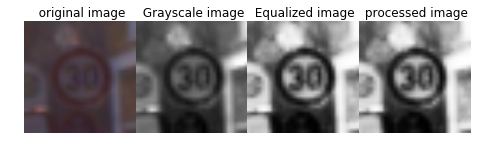

In [34]:
img = X_train[y_train==1]
img_0 = img[0]
proc_img = preprocessImages(img)[0]

gray_img = cv2.cvtColor(img_0,cv2.COLOR_RGB2GRAY)
eq_img = cv2.equalizeHist(gray_img)

fig, axs = plt.subplots(1, 4, figsize=(8, 8))
fig.subplots_adjust(hspace = 4, wspace=.001)
axs = axs.ravel()
axs[0].axis('off')
axs[0].set_title("  original image ")
axs[0].imshow(img[0])

axs[1].axis('off')
axs[1].set_title(" Grayscale image")
axs[1].imshow(gray_img,cmap='gray')
axs[2].axis('off')
axs[2].set_title(" Equalized image")
axs[2].imshow(eq_img,cmap='gray')

axs[3].axis('off')
axs[3].set_title(" processed image")
axs[3].imshow(proc_img[:,:,0],cmap='gray')




# Model architecture





I am using the Lenet architecture for classification. Initially I tried using a deeper 3 convolutional layers, but was unable to get the hyperparameters working nicely. My loss wasn't decreasing and error was constant. Perhaps, my learning rate of 0.001 was too high.

Input : Nx32x32x1 Dimension
Layer 1 : Convolutional layer with 16 5x5 filters. Stride was 1 and valid padding was chosen. Used Relu Activation.
        Then used max pooling with 2x2 stride and 2x2 kernel.
Input : Nx14x14x16 Dimension
Layer 2 : Convolutional Layer with 32 5x5 filters. Stride was 1 and valid padding was chosen.Used Relu Activation.
        Then used max pooling with 2x2 stride and 2x2 kernel.

Flattened the above with droput of 0.8. (Chosen after experimenting with 0.5,0.6,0.7,0.8)
Input ; Nx800
Layer 3 :    Fully connected layer of 128 size. (Tried 256 and more, but had slow learning with those sizes)

Layer 4 :    Fully connected layer of 64 size. (Tried 128  but had slow learning with those sizes)

Softmax Layer : Size 43- to take output probabilities across classes
                

Fixed learning rate of 0.001 and ran for 25 epochs.

Training Loss : 0.020
Training accuracy : 99.4%

Test Loss: 0.524
Test Accuracy : 91.7%

Validation Loss: 0.363
Validation Accuracy: 93.4%

My validation loss goes up and down sometimes so  I think I should have stopped before using early stopping criteria.

Since we get a decent accuracy of 93.4% on validation and 91.5% on testing set, I believe that even though LeNet is fairly simple, it still gives a good performance for the data. 




### Model Architecture

In [85]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf
from tensorflow.contrib.layers import flatten

def trafficNet(x,num_filters=16):
    """
    This network is a modified LeNet used for classifying traffic signals
    """
    mu = 0
    sigma = 0.1
    """
    First set of convolution and pooling layer
    input : 32x32x1
    output : 28x28xnum_filters
    """
    conv1_w = tf.Variable(tf.truncated_normal([5,5,1,num_filters],mean=mu,stddev=sigma))
    conv1_b = tf.Variable(tf.zeros([num_filters]))
    conv1 = tf.nn.conv2d(x,conv1_w,strides=[1,1,1,1],padding='VALID')
    conv_layer1 = tf.nn.bias_add(conv1,conv1_b) # convolution layer 1 # 28x28x16
    conv_activ1 = tf.nn.relu(conv_layer1) # activation after layer 1 
    conv_pool1 = tf.nn.max_pool(conv_activ1,ksize=[1,2,2,1],strides=[1,2,2,1],padding='VALID') # 14x14x16
    
    """
    Second set of convolution and pooling layer
    input : 14x14xnum_filters
    output : 5x5x(2num_filters)
    """
    
    conv2_w = tf.Variable(tf.truncated_normal([5,5,num_filters,2*num_filters], mean=mu, stddev=sigma))
    conv2_b = tf.Variable(tf.zeros([2*num_filters]))
    conv2 = tf.nn.conv2d(conv_pool1,conv2_w,strides=[1,1,1,1],padding='VALID')
    conv_layer2 = tf.nn.bias_add(conv2,conv2_b) # convolution layer 2 # 10x10x32
    conv_activ2 = tf.nn.relu(conv_layer2) # activation layer 2
    conv_pool2 = tf.nn.max_pool(conv_activ2,ksize=[1,2,2,1],strides=[1,2,2,1],padding='VALID') # 5x5x32
    
    layer_flatten = flatten(conv_pool2)
    layer_dropout = tf.nn.dropout(layer_flatten,keep_prob=0.8)
    
     # Fully Connected Layer
    layer_fc1 = tf.contrib.layers.fully_connected(layer_dropout, int(num_filters*8), tf.nn.relu)

    tf.contrib.layers.fully_connected
    # Fully Connected Layer
    layer_fc2 = tf.contrib.layers.fully_connected(layer_fc1, int(num_filters*4), tf.nn.relu)

    # Fully Connected Layer
    layer_fc3 = tf.contrib.layers.fully_connected(layer_fc2, n_classes, tf.nn.relu)

    logits = layer_fc3
    return logits
    


###  How to Train the model

I trained the model iteratively with the following hyperparameters.

1. No of epochs : 25
2. optimizer : Adam Optimizer
3. Learning Rate : 0.001
4. Batch Size : 128
5. For weight Initialisation, I used mean of 0 and std deviation of 0.1    

### How did I come up with this model ?

Initially I tried with Lenet Model and got an accuracy less than the required accuracy. 
I made my cnn layers wider, but then it trained very slowly and wasn't performing good till 40 epochs on my learning rate. Increase learning rate, led to zero learning.

Then I increase the number of cnn layers. Again, I was facing difficulties in fixing hyperparameters for this kind of network.

Finally I decided to improve LeNet to get good accuracy. I increased the network deeper, by using more number of filters. So, I stuck to 16 as a good initial number of filters. 
Then in the next layer, I increased the number of filters to double. Finally I flattened the layer and got 800 dimensional features. Now with good number of hit and trials, I fixed the dimension of last 2 layers.
Also, I didn't add dropout for the first  layers, as the first two layers try to learn general features. 
I only added a dropout during flattening my 2nd conv layer output, to prevent overfitting. 
Keep probability of 0.8 was chosen after experimenting with [0.5,0.6,0.7,0.8] . 






### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [52]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
# Code taken from lecture notes of lenet

x = tf.placeholder(tf.float32,[None,32,32,1])
y = tf.placeholder(tf.int64,[None])
from sklearn.utils import shuffle
import time
EPOCHS = 25
BATCH_SIZE = 128
LEARNING_RATE = 0.0005

logits = trafficNet(x)
cross_entropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits,y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate=LEARNING_RATE)
training_operation = optimizer.minimize(loss_operation)

inference_operation = tf.argmax(logits, 1)
correct_prediction = tf.equal(inference_operation, y)
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    total_loss = 0
    inference_data = np.array([])
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        end = offset + BATCH_SIZE
        batch_x, batch_y = X_data[offset:end], y_data[offset:end]
        accuracy, loss, inference = sess.run([accuracy_operation, loss_operation, inference_operation], feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
        total_loss += (loss * len(batch_x))
        inference_data = np.append(inference_data, inference)
    return total_accuracy / num_examples, total_loss / num_examples, inference_data


with tf.Session() as sess:
    print("Training with {} inputs...".format(len(X_train_processed)))
    print()
    sess.run(tf.global_variables_initializer())
    
    for i in range(EPOCHS):
        start_time =  time.time()
        num_examples = len(X_train_processed)
        X_train_processed, y_train = shuffle(X_train_processed, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_processed[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy, validation_loss, inference_data = evaluate(X_valid_processed, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print("Validation Loss = {:.3f}".format(validation_loss))
        print("Time Taken = {:.2f} sec".format(time.time() - start_time))
        print()
            
    saver.save(sess, 'modified_lenet')
    print("Model saved")









Training with 56368 inputs...

EPOCH 1 ...
Validation Accuracy = 0.396
Validation Loss = 2.364
Time Taken = 12.35 sec

EPOCH 2 ...
Validation Accuracy = 0.638
Validation Loss = 1.329
Time Taken = 12.42 sec

EPOCH 3 ...
Validation Accuracy = 0.758
Validation Loss = 0.884
Time Taken = 12.32 sec

EPOCH 4 ...
Validation Accuracy = 0.824
Validation Loss = 0.655
Time Taken = 12.32 sec

EPOCH 5 ...
Validation Accuracy = 0.856
Validation Loss = 0.556
Time Taken = 12.31 sec

EPOCH 6 ...
Validation Accuracy = 0.878
Validation Loss = 0.490
Time Taken = 12.31 sec

EPOCH 7 ...
Validation Accuracy = 0.893
Validation Loss = 0.431
Time Taken = 12.42 sec

EPOCH 8 ...
Validation Accuracy = 0.900
Validation Loss = 0.426
Time Taken = 12.30 sec

EPOCH 9 ...
Validation Accuracy = 0.913
Validation Loss = 0.363
Time Taken = 12.37 sec

EPOCH 10 ...
Validation Accuracy = 0.910
Validation Loss = 0.348
Time Taken = 12.29 sec

EPOCH 11 ...
Validation Accuracy = 0.907
Validation Loss = 0.387
Time Taken = 12.33 sec


## Test Accuracy Metrics

Test Accuracy = 0.917
Test Loss = 0.524


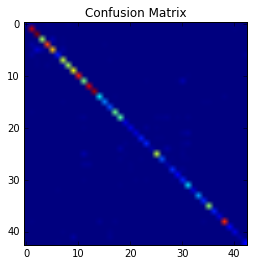

In [54]:
from sklearn.metrics import confusion_matrix

# Train model accuracy
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    ""
    test_accuracy, test_loss, inference_data = evaluate(X_test_processed, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    print("Test Loss = {:.3f}".format(test_loss))
    
    plt.title('Confusion Matrix')
    plt.imshow(confusion_matrix(y_true = y_test,y_pred = inference_data))

## Training Accuracy Metrics

Train Accuracy = 0.994
Train Loss = 0.020


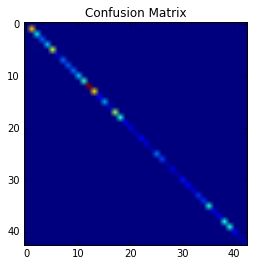

In [55]:
from sklearn.metrics import confusion_matrix

# Train model accuracy
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    ""
    test_accuracy, test_loss, inference_data = evaluate(X_train_processed, y_train)
    print("Train Accuracy = {:.3f}".format(test_accuracy))
    print("Train Loss = {:.3f}".format(test_loss))
    
    plt.title('Confusion Matrix')
    plt.imshow(confusion_matrix(y_true = y_train,y_pred = inference_data))

---

## Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [57]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

import os
import matplotlib
file_sign = {'30kmhr.png':1,
              'keepright.png': 38,
             'yield.png' : 13,
              'noentry.png' : 17,
             'stop.png' : 14,
             'noentryoccluded.png' : 17,
            }



X_web_test = np.empty([0,X_test.shape[1],X_test.shape[2],X_test.shape[3]],dtype=np.uint8)
y_web_test = np.empty([0],dtype=y_test.dtype)

image_files = os.listdir('web_data/')
for file_ in image_files:
    img = matplotlib.image.imread('web_data/'+file_)
    

    X_web_test = np.append(X_web_test,img[np.newaxis,...],axis=0)
    y_web_test = np.append(y_web_test,file_sign[file_])
    
    




# Original Picture with labels

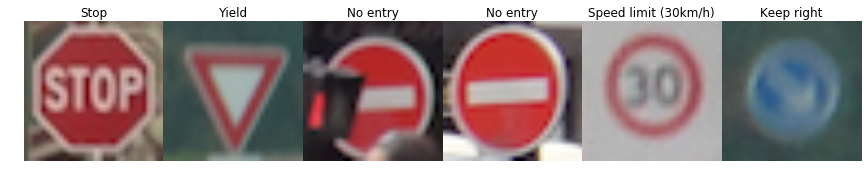

In [59]:
# Original Labels 
fig, axs = plt.subplots(1, 6, figsize=(15, 10))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()
for i in range(0, 6):
    image = X_web_test[i]    
    axs[i].axis('off')
    axs[i].set_title(sign_name[y_web_test[i]])
    axs[i].imshow(image)


In [60]:
# Processed images

In [61]:
X_web_test_gray = np.array([cv2.cvtColor(image, cv2.COLOR_RGB2GRAY) for image in X_web_test])

X_web_test_abs = np.array([cv2.convertScaleAbs(image) for image in X_web_test_gray])
X_web_test_histeq = np.array([cv2.equalizeHist(image) for image in X_web_test_abs])
X_web_test_reshaped = X_web_test_histeq[..., np.newaxis]
X_web_test_processed = X_web_test_reshaped - np.mean(X_web_test_reshaped)



In [62]:
X_web_test_processed.shape

(6, 32, 32, 1)

### Predict the Sign Type for Each Image

Testing 6 test images...
Inferred classes: [34 13 17 17  1 25]


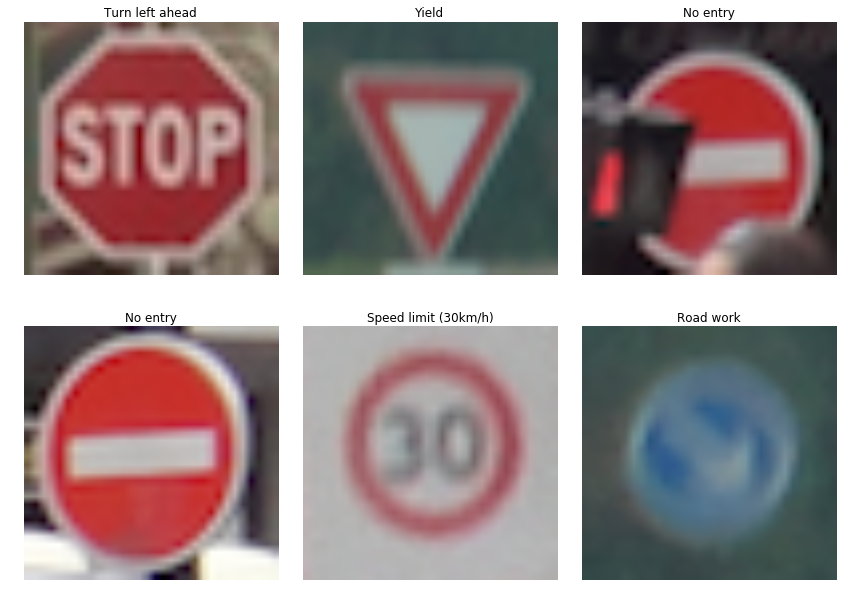

In [82]:
import os
import matplotlib.image as mpimg
import numpy
from numpy import  newaxis
# test on web images


with tf.Session() as sess:
    print("Testing {} test images...".format(len(X_web_test_processed)))
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    inference_output = sess.run(inference_operation, feed_dict={x: X_web_test_processed})
    print("Inferred classes:", inference_output)

    count = len(X_web_test_processed)
    fig, axs = plt.subplots(2, 3, figsize=(15, 10))
    fig.subplots_adjust(hspace = .2, wspace=.001)
    axs = axs.ravel()
    for i in range(6):
        image = X_web_test[i]
        evaluated = inference_output[i]

        axs[i].axis('off')
        axs[i].set_title(sign_name[evaluated])
        axs[i].imshow(image)

### Q3  Analyze Performance

For the given 6 images, I got an accuracy of 83.3%. The keep right sign wasn't correctly estimated . 
This is possible for 2 reasons. First had we taken color into consideration, the chances of it getting that class were neglegible.
However, we use grayscale images only. Also, the shape of No vechiles over 1 ton class and the take right class are very similar.
The image itself was a bit blurry. That along with my network being a bit underfitted, could have led to false classification.
However on the bright side, the occluded no entry was still correctly classified. This suggests Convolutional Neural networks are better than classical
Classification algorithms

# Top 5 classes of the images

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

top k indices : [14 17 39 34 40]
top k classes : Stop    No entry    Keep left    Turn left ahead    Roundabout mandatory
top k probabilites : [  1.00000000e+00   5.72078995e-10   6.62014818e-11   1.11998063e-12
   7.18998916e-13]


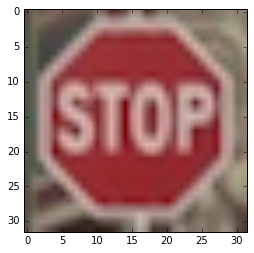

###############################################################################

top k indices : [13 35 38  0  1]
top k classes : Yield    Ahead only    Keep right    Speed limit (20km/h)    Speed limit (30km/h)
top k probabilites : [  1.00000000e+00   3.65125664e-36   2.91332399e-36   0.00000000e+00
   0.00000000e+00]


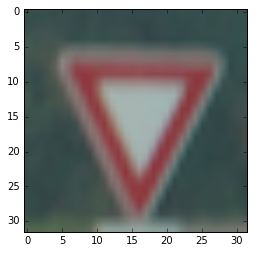

###############################################################################

top k indices : [17 40 36 14  1]
top k classes : No entry    Roundabout mandatory    Go straight or right    Stop    Speed limit (30km/h)
top k probabilites : [  1.00000000e+00   1.57095270e-09   1.85551487e-11   6.33074485e-13
   1.24072852e-14]


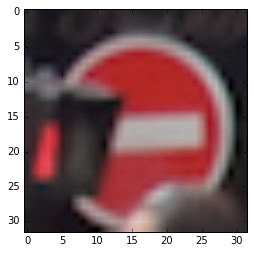

###############################################################################

top k indices : [17  0  1  2  3]
top k classes : No entry    Speed limit (20km/h)    Speed limit (30km/h)    Speed limit (50km/h)    Speed limit (60km/h)
top k probabilites : [ 1.  0.  0.  0.  0.]


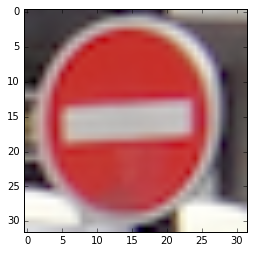

###############################################################################

top k indices : [1 5 4 8 6]
top k classes : Speed limit (30km/h)    Speed limit (80km/h)    Speed limit (70km/h)    Speed limit (120km/h)    End of speed limit (80km/h)
top k probabilites : [  1.00000000e+00   2.08836450e-08   7.41790865e-14   3.77427532e-16
   4.01496202e-19]


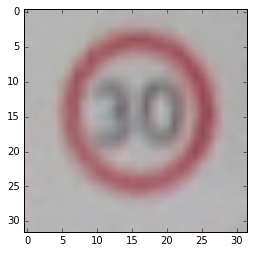

###############################################################################

top k indices : [25 12  1  5 11]
top k classes : Road work    Priority road    Speed limit (30km/h)    Speed limit (80km/h)    Right-of-way at the next intersection
top k probabilites : [  8.12361538e-01   1.80391148e-01   6.57994021e-03   4.34008980e-04
   9.75273506e-05]


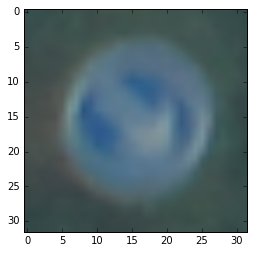

###############################################################################



In [84]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

softmax_prob = tf.nn.softmax(logits=logits) # Added softmax operation to probabilities
top_k_operation = tf.nn.top_k(softmax_prob, n_classes)



with tf.Session() as sess:
    #print(top_k_output.values,top_k_indices)

    saver.restore(sess, tf.train.latest_checkpoint('.'))
    top_k_output = sess.run(top_k_operation, feed_dict={x: X_web_test_processed,y: y_web_test})
    
    
    for i in range(6):
        print("top k indices : {0}".format(top_k_output.indices[i][0:5]))
        print("top k classes : {0}".format('    '.join(str(sign_name[i]) for i in  top_k_output.indices[i][0:5] )))
        print("top k probabilites : {0}".format(top_k_output.values[i][0:5]))
        
        
        plot.imshow(X_web_test[i])
        plot.show()
        print("###############################################################################\n")





